In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps, ImageFilter, ImageEnhance
from tqdm import tqdm


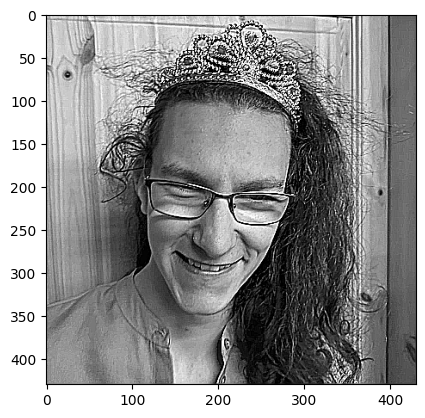

In [2]:
img = cv2.imread("../takyradim.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.resize(img, (img.shape[1] * 2, img.shape[0] * 2))

# img = np.full_like(img, 255) - img


img_pil = Image.fromarray(img)
img_pil = img_pil.filter(ImageFilter.EDGE_ENHANCE_MORE)
# img_pil = img_pil.filter(ImageFilter.EDGE_ENHANCE_MORE)
# enhanced = cv2.Canny(img, 30, 70)

img = np.array(img_pil)
# img = cv2.addWeighted(img, 0.9, cv2.GaussianBlur(enhanced, (5, 5), 7), 1.0, 0)


plane = np.full_like(img, 255)
plane[0, 0] = 0
plane[0, 1] = 255


imshow(img, cmap="gray")


In [3]:
def generate_circle_points(center, radius, n):
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    points = [
        (center[0] + radius * np.cos(angle), center[1] + radius * np.sin(angle))
        for angle in angles
    ]
    return points


print(img.shape)
center = (img.shape[0] // 2, img.shape[1] // 2)
radius = min(img.shape[0], img.shape[1]) // 2 - 5
n = 118
circle_points = generate_circle_points(center, radius, n)

# Plot the points on the image
# for point in circle_points:
# img_gray[int(point[1]), int(point[0])] = 255

# imshow(img_gray, cmap="gray")

spagat = [0]


(430, 430)


  0%|          | 0/250 [00:00<?, ?it/s]

100%|██████████| 250/250 [00:04<00:00, 60.31it/s]


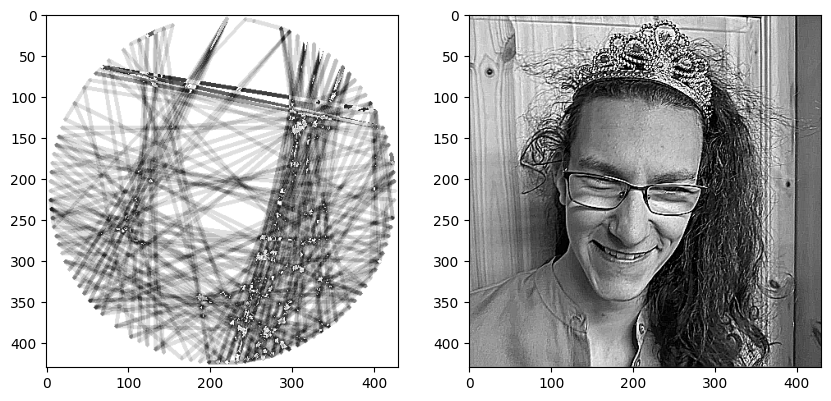

In [4]:
import math


for _ in tqdm(range(250)):
    actual = spagat[-1]
    best = [-1, math.inf]
    for i, point in enumerate(circle_points):
        if i == actual:
            continue

        line_img = cv2.line(
            np.full_like(plane, 0),
            tuple(map(int, circle_points[actual])),
            tuple(map(int, point)),
            32,
            3,
            # lineType=cv2.LINE_AA,
        )

        tmp_plane = plane - line_img

        error_img = tmp_plane - img
        error = np.sum(error_img)

        if error < best[1]:
            best = [i, error]

    spagat.append(best[0])

    line_plane = cv2.line(
        np.full_like(plane, 0),
        tuple(map(int, circle_points[actual])),
        tuple(map(int, circle_points[best[0]])),
        32,
        3,
    )

    plane = plane - line_plane


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(plane, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(img, cmap="gray")


In [5]:
spagat


[0,
 62,
 24,
 61,
 12,
 60,
 22,
 64,
 17,
 58,
 115,
 46,
 3,
 45,
 105,
 47,
 117,
 37,
 113,
 56,
 108,
 58,
 11,
 65,
 20,
 51,
 13,
 66,
 111,
 30,
 101,
 29,
 102,
 28,
 100,
 28,
 103,
 27,
 55,
 6,
 42,
 5,
 53,
 22,
 63,
 4,
 40,
 8,
 52,
 107,
 59,
 17,
 95,
 18,
 97,
 25,
 98,
 26,
 103,
 29,
 57,
 7,
 69,
 33,
 117,
 45,
 13,
 56,
 26,
 104,
 27,
 98,
 23,
 100,
 29,
 54,
 112,
 27,
 116,
 44,
 9,
 37,
 81,
 38,
 74,
 11,
 46,
 12,
 57,
 25,
 109,
 65,
 4,
 28,
 103,
 30,
 53,
 115,
 26,
 108,
 6,
 32,
 103,
 25,
 8,
 54,
 20,
 96,
 21,
 99,
 18,
 51,
 34,
 116,
 39,
 80,
 40,
 71,
 112,
 21,
 49,
 96,
 48,
 89,
 47,
 89,
 46,
 89,
 49,
 89,
 45,
 17,
 100,
 30,
 7,
 26,
 100,
 27,
 1,
 61,
 106,
 24,
 9,
 109,
 3,
 64,
 5,
 109,
 10,
 24,
 104,
 22,
 57,
 19,
 103,
 31,
 82,
 42,
 18,
 27,
 79,
 36,
 75,
 3,
 111,
 72,
 67,
 8,
 108,
 48,
 15,
 24,
 103,
 23,
 27,
 14,
 77,
 26,
 113,
 74,
 111,
 74,
 111,
 74,
 111,
 73,
 111,
 73,
 74,
 109,
 74,
 109,
 74,
 109,
 74,
 